# **Installations for google colab**

In [ ]:
# All necessary installations for google colab
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 18.8 MB/s eta 0:00:00


In [ ]:
!pip install ogb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=143f9362ec834b4044883862b4dc8968f7e9ae810b20b108f17ad62dbdc12e94
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 37.2 MB/s eta 0:00:00


In [ ]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=fea71405c18934d917ddbc2bf8e429aa89ed7e99e8fea4f885b5f3d5aeaa9f86
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


# **Loading the Dataset**

In [ ]:
import numpy as np
import torch
from ogb.graphproppred import PygGraphPropPredDataset
from torch_geometric.data import DataLoader

# Function for setting the seed
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
set_seed(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Fetching the device that will be used throughout this notebook
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)

dataset = PygGraphPropPredDataset(name = "ogbg-molhiv")
print(type(dataset))

split_idx = dataset.get_idx_split()
train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False)
test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False)

Using device cpu


Downloaded 0.00 GB: 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]
Processing...


Extracting dataset/hiv.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 41127/41127 [00:00<00:00, 41841.82it/s]


Converting graphs into PyG objects...


100%|██████████| 41127/41127 [00:01<00:00, 20644.82it/s]


Saving...
<class 'ogb.graphproppred.dataset_pyg.PygGraphPropPredDataset'>


Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


* x: A node feature matrix with shape (num_nodes, num_node_features). Each row of this matrix represents a node (atom) in the molecule, and each column represents a different feature (such as atom type or charge).
* edge_index: An edge index matrix with shape (2, num_edges). Each column of this matrix represents an edge between two nodes (atoms) in the molecule. The two rows of each column correspond to the source and target nodes of the edge, respectively.
* y: The binary label for the molecule, indicating whether it is active against HIV or not.
* The edge_attr tensor will not be empty if you have edge features in your graph. If you have edge features, edge_attr will be a tensor of shape (num_edges, num_edge_features). In the case of the obgb-molhiv dataset, the edges do have features, so edge_attr will not be empty.

* edge_index: edges
* edge_attr: edge/bond features
  10. bond type
  11. bond stereo
  12. is conjugated

* x: 9 node/atom features for 22 nodes -->
  1. atomic number,
  2. chilarity,
  3. degree,
  4. formal charge,
  5. numH,
  6. number_radical_e,
  7. hybridization,
  8. is aromatic
  9. is in ring
* y: label for this node
* num_nodes: number of nodes

In [ ]:
print(dataset[1800])
#print(dataset[1800].y)
#print(dataset[1800].x)
#print(dataset[1800].edge_index)
#print(dataset[1800].edge_attr)

Data(edge_index=[2, 62], edge_attr=[62, 3], x=[26, 9], y=[1, 1], num_nodes=26)


In [ ]:
print(f"Average label: {dataset.y.float().mean().item():4.2f}")
print(len(split_idx["train"])/len(dataset)*100)
print(len(split_idx["valid"])/len(dataset)*100)
print(len(split_idx["test"])/len(dataset)*100)

Average label: 0.04
79.99854110438397
10.000729447808009
10.000729447808009


In [ ]:
import pandas as pd

csv_path = '/content/drive/My Drive/Colab Notebooks/Molecule Classification/hiv.csv'
df = pd.read_csv(csv_path)
df.head(5)
df.drop('mol_id', axis='columns', inplace=True)
df.head(5)


,HIV_active,smiles
0,0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...
1,0,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...
2,0,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21
3,0,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1
4,0,O=S(=O)(O)CCS(=O)(=O)O


In [ ]:
from ogb.utils.features import (allowable_features, atom_to_feature_vector,
 bond_to_feature_vector, atom_feature_vector_to_dict, bond_feature_vector_to_dict)
from rdkit import Chem
import numpy as np


def ReorderCanonicalRankAtoms(mol):
    order = tuple(zip(*sorted([(j, i) for i, j in enumerate(Chem.CanonicalRankAtoms(mol))])))[1]
    mol_renum = Chem.RenumberAtoms(mol, order)
    return mol_renum, order

def smiles2graph(smiles_string, removeHs=True, reorder_atoms=False):
    """
    Converts SMILES string to graph Data object
    :input: SMILES string (str)
    :return: graph object
    """

    mol = Chem.MolFromSmiles(smiles_string)
    mol = mol if removeHs else Chem.AddHs(mol)
    if reorder_atoms:
        mol, _ = ReorderCanonicalRankAtoms(mol)

    # atoms
    atom_features_list = []
    for atom in mol.GetAtoms():
        atom_features_list.append(atom_to_feature_vector(atom))
    x = np.array(atom_features_list, dtype = np.int64)

    # bonds
    num_bond_features = 3  # bond type, bond stereo, is_conjugated
    if len(mol.GetBonds()) > 0: # mol has bonds
        edges_list = []
        edge_features_list = []
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()

            edge_feature = bond_to_feature_vector(bond)

            # add edges in both directions
            edges_list.append((i, j))
            edge_features_list.append(edge_feature)
            edges_list.append((j, i))
            edge_features_list.append(edge_feature)

        # data.edge_index: Graph connectivity in COO format with shape [2, num_edges]
        edge_index = np.array(edges_list, dtype = np.int64).T

        # data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]
        edge_attr = np.array(edge_features_list, dtype = np.int64)

    else:   # mol has no bonds
        edge_index = np.empty((2, 0), dtype = np.int64)
        edge_attr = np.empty((0, num_bond_features), dtype = np.int64)

    graph = dict()
    graph['edge_index'] = edge_index
    graph['edge_feat'] = edge_attr
    graph['node_feat'] = x
    graph['num_nodes'] = len(x)

    return graph

graph = smiles2graph(df['smiles'][0])

In [ ]:
print(graph)

{'edge_index': array([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
         6,  9,  4, 10, 10, 11, 11, 12, 12, 13, 11, 14, 14, 15, 15, 16,
        16, 17, 15, 18,  9,  2, 18,  4],
       [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,
         9,  6, 10,  4, 11, 10, 12, 11, 13, 12, 14, 11, 15, 14, 16, 15,
        17, 16, 18, 15,  2,  9,  4, 18]]), 'edge_feat': array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
      

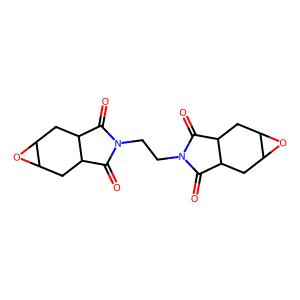

In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

# SMILES string of the molecule
ss = df['smiles'][1800]

# Create a molecule object from the SMILES string
mol = Chem.MolFromSmiles(ss)

# Generate a 2D depiction of the molecule
img = Draw.MolToImage(mol)

# Display the image
img.show()

In [ ]:
from ogb.graphproppred import Evaluator

evaluator = Evaluator(name = "ogbg-molhiv")

# Molecular Fingerprints

In [ ]:
from rdkit.Chem import AllChem
from tqdm import tqdm
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import rdMolDescriptors

In [ ]:
smiles_col = df['smiles']
molecules = [Chem.MolFromSmiles(x) for x in smiles_col]


def MorganFingerprintsNumpy(molecules):
  #rdkit_mol = AllChem.MolFromSmiles(molecules)
  morgan = np.array([AllChem.GetMorganFingerprintAsBitVect(x, 2) for x in tqdm(molecules)])
  morgan_df = pd.DataFrame(morgan)
  return morgan_df

#morgan_df = MorganFingerprintsNumpy(molecules)
#print(morgan_df.head())

[13:54:06] WARNING: not removing hydrogen atom without neighbors
[13:54:06] WARNING: not removing hydrogen atom without neighbors


In [ ]:
def MACCSFingerprintsNumpy(molecules):
  #rdkit_mol = AllChem.MolFromSmiles(mol)
  #fp = AllChem.GetMACCSKeysFingerprint(rdkit_mol)
  #return [int(b) for b in fp.ToBitString()]
  maccs = np.array([AllChem.GetMACCSKeysFingerprint(x) for x in tqdm(molecules)])
  maccs_df = pd.DataFrame(maccs)
  return maccs_df

#maccs_df = MACCSFingerprintsNumpy(molecules)
#print(maccs_df.head())

In [ ]:
def AvalonFingerprintsNumpy(molecules):
  #rdkit_mol = AllChem.MolFromSmiles(mol)
  avalon = np.array([pyAvalonTools.GetAvalonFP(x, nBits=512) for x in tqdm(molecules)])
  avalon_df = pd.DataFrame(avalon)
  return avalon_df

#avalon_df = AvalonFingerprintsNumpy(molecules)
#print(avalon_df.head())

In [ ]:
def TopologicalTorsionsFingerprintsNumpy(molecules):
  #rdkit_mol = AllChem.MolFromSmiles(mol)
  tt = np.array([rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(x, nBits=512) for x in tqdm(molecules)])
  tt_df = pd.DataFrame(tt)
  return tt_df

#tt_df = TopologicalTorsionsFingerprintsNumpy(molecules)
#print(tt_df.head())

In [ ]:
def RDKFingerprintsNumpy(molecules):
  #rdkit_mol = AllChem.MolFromSmiles(mol)
  rdkbi = {}
  rdk = np.array([AllChem.RDKFingerprint(x, maxPath=5, fpSize=512, bitInfo=rdkbi) for x in tqdm(molecules)])
  rdk_df = pd.DataFrame(rdk)
  return rdk_df

#rdk_df = RDKFingerprintsNumpy(molecules)
#print(rdk_df.head())

In [ ]:
fingerprint_df_dict = {
    "morgan" : MorganFingerprintsNumpy(molecules),
    "maccs" : MACCSFingerprintsNumpy(molecules),
    "Avalon" : AvalonFingerprintsNumpy(molecules),
    "Topological Torsions" : TopologicalTorsionsFingerprintsNumpy(molecules),
    "RDK" : RDKFingerprintsNumpy(molecules)
}

torch.save(fingerprint_df_dict, "fingerprints.tar")
del fingerprint_df_dict

100%|██████████| 41127/41127 [00:57<00:00, 713.17it/s]


In [ ]:
fpdf_dict = torch.load("fingerprints.tar")

In [ ]:
combinations = [["morgan", "maccs", "RDK"],
                ["morgan", "maccs", "Avalon", "RDK"],
                ["morgan", "maccs", "Topological Torsions", "RDK"],
                ["morgan", "maccs","Avalon", "Topological Torsions", "RDK"]]

scores_comb_dict = {
    "MMR" : [],
    "MMAR" : [],
    "MMTR" : [],
    "MMATR" : []
}

def find_comb(comb):
  if comb == ["morgan", "maccs", "RDK"]:
    return "MMR"
  if comb == ["morgan", "maccs", "Avalon", "RDK"]:
    return "MMAR"
  if comb == ["morgan", "maccs", "Topological Torsions", "RDK"]:
    return "MMTR"
  if comb == ["morgan", "maccs","Avalon", "Topological Torsions", "RDK"]:
    return "MMATR"



# Random Forest

In [ ]:
import random
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

labels = df['HIV_active']
split_idx = dataset.get_idx_split()
train_idx = np.array(split_idx["train"])
valid_idx = np.array(split_idx["valid"])
test_idx = np.array(split_idx["test"])
for comb in combinations:
  print("Working with:")
  print(comb)
  current_df = labels
  for i in range(len(comb)):
    current_df = pd.concat([current_df, fpdf_dict[comb[i]]], axis = 1)
  print("Dataframe with labels")
  print(current_df.head())

  # create the correlation matrix
  corr = np.corrcoef(np.transpose(current_df))
  corr = pd.DataFrame(corr)
  mask = np.triu(np.ones_like(corr, dtype=bool))
  tri_df = corr.mask(mask)

  # drop the appropriate columns so as to eliminate correlations above 90%
  column_drop = [x for x in tri_df.columns if any(abs(tri_df[x])>0.9)]
  # new dataframe
  reduced_current_df = current_df.drop(current_df.columns[column_drop], axis = 1)

  del corr
  del mask
  del tri_df

  train = pd.DataFrame(reduced_current_df.iloc[train_idx,:])
  val = pd.DataFrame(reduced_current_df.iloc[valid_idx,:])
  test = pd.DataFrame(reduced_current_df.iloc[test_idx,:])

  val_x = val.iloc[:,1:]
  val_y = val.iloc[:,0]
  test_x = test.iloc[:,1:]
  test_y = test.iloc[:,0]
  #scores
  score_val = []
  score_test = []
  test_erg = []
  val_erg = []

  del reduced_current_df
  rand_state_list = random.sample(range(2024), 10)

  for rand_state in rand_state_list:
    inactive_mol = train.loc[train['HIV_active'] == 0]
    active_mol = train.loc[train['HIV_active']==1]
    inactive_small = inactive_mol.sample(frac= 0.3, random_state=rand_state)
    slist = pd.concat([active_mol, inactive_small], axis = 0)
    slist = slist.sample(frac=1.0, random_state=rand_state)
    train_x = slist.iloc[:,1:]
    train_y = slist.iloc[:,0]

    randomForest = RandomForestClassifier(n_estimators=500,
                                random_state=i,
                                n_jobs = 4,
                                min_samples_leaf=2,
                                criterion="entropy",
                                min_impurity_decrease=0,
                                warm_start= True,
                                max_features = "auto",
                                max_depth = None,
                                min_samples_split=10
                                    )
    randomForest.fit(train_x, train_y)

    y_hat = randomForest.predict_proba(val_x)[:,1]
    erg = roc_auc_score(val_y, y_hat)
    val_erg.append(erg)

    y_hat_test = randomForest.predict_proba(test_x)[:,1]
    erg_test = roc_auc_score(test_y,y_hat_test)
    test_erg.append(erg_test)


    val_y = np.array(val_y)
    input_dict_val = {"y_true":val_y.reshape(val_y.shape[0],1),"y_pred":y_hat.reshape(y_hat.shape[0],1)}
    score_val.append(evaluator.eval(input_dict_val)[dataset.eval_metric])


    test_y = np.array(test_y)
    input_dict = {"y_true":test_y.reshape(test_y.shape[0],1),"y_pred":y_hat_test.reshape(y_hat_test.shape[0],1)}
    score_test.append(evaluator.eval(input_dict)[dataset.eval_metric])


    print("\n Random state:", rand_state)
    print("\n Validation ROC-AUC:","%.4f"%erg)
    print("\n Test:","%.4f"%erg_test)

  print("Validation ROC-AUC --Final results:\n",np.mean(score_val),"+/-", np.std(score_val))
  print("Test ROC-AUC --Final results:\n", np.mean(score_test), "+/-", np.std(score_test))
  scores_comb_dict[find_comb(comb)] = [np.mean(score_val), np.std(score_val), np.mean(score_test), np.std(score_test)]
  del train
  del val
  del test
  del slist
  del inactive_mol
  del active_mol
  del train_x
  del train_y
  del val_y
  del test_y

Working with:
['morgan', 'maccs', 'RDK']
Dataframe with labels
   HIV_active  0  1  2  3  4  5  6  7  8  ...  502  503  504  505  506  507  \
0           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1           0  0  0  0  0  0  0  0  0  0  ...    1    0    0    1    0    0   
2           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    1    1   
3           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    1    0   
4           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

   508  509  510  511  
0    1    0    0    0  
1    1    0    0    0  
2    0    1    0    1  
3    0    0    0    0  
4    0    0    0    0  

[5 rows x 2728 columns]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1138

 Validation ROC-AUC: 0.8161

 Test: 0.8087


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 146

 Validation ROC-AUC: 0.8145

 Test: 0.8039


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1039

 Validation ROC-AUC: 0.8300

 Test: 0.8086


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 716

 Validation ROC-AUC: 0.8162

 Test: 0.8205


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 2018

 Validation ROC-AUC: 0.8063

 Test: 0.8146


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 907

 Validation ROC-AUC: 0.8164

 Test: 0.8058


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1689

 Validation ROC-AUC: 0.8183

 Test: 0.8060


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1984

 Validation ROC-AUC: 0.8271

 Test: 0.8205


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1835

 Validation ROC-AUC: 0.8145

 Test: 0.8119


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1333

 Validation ROC-AUC: 0.8203

 Test: 0.8083
Validation ROC-AUC --Final results:
 0.8179826817558299 +/- 0.006342374867680874
Test ROC-AUC --Final results:
 0.810884721605284 +/- 0.0055997405883402036
Working with:
['morgan', 'maccs', 'Avalon', 'RDK']
Dataframe with labels
   HIV_active  0  1  2  3  4  5  6  7  8  ...  502  503  504  505  506  507  \
0           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1           0  0  0  0  0  0  0  0  0  0  ...    1    0    0    1    0    0   
2           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    1    1   
3           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    1    0   
4           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

   508  509  510  511  
0    1    0    0    0  
1    1    0    0    0  
2    0    1    0    1  
3    0    0    0    0  
4    0    0    0    0  

[5 rows x 3240 columns]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1777

 Validation ROC-AUC: 0.8151

 Test: 0.8058


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1518

 Validation ROC-AUC: 0.8155

 Test: 0.8121


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1655

 Validation ROC-AUC: 0.8144

 Test: 0.8072


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1598

 Validation ROC-AUC: 0.8266

 Test: 0.8111


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 358

 Validation ROC-AUC: 0.8231

 Test: 0.8166


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1820

 Validation ROC-AUC: 0.8023

 Test: 0.8146


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 909

 Validation ROC-AUC: 0.8078

 Test: 0.8028


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1038

 Validation ROC-AUC: 0.8314

 Test: 0.8121


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 531

 Validation ROC-AUC: 0.8171

 Test: 0.8018


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 312

 Validation ROC-AUC: 0.8135

 Test: 0.8119
Validation ROC-AUC --Final results:
 0.8166773834019203 +/- 0.008144654912356214
Test ROC-AUC --Final results:
 0.8095982927441627 +/- 0.004703500344398489
Working with:
['morgan', 'maccs', 'Topological Torsions', 'RDK']
Dataframe with labels
   HIV_active  0  1  2  3  4  5  6  7  8  ...  502  503  504  505  506  507  \
0           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1           0  0  0  0  0  0  0  0  0  0  ...    1    0    0    1    0    0   
2           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    1    1   
3           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    1    0   
4           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

   508  509  510  511  
0    1    0    0    0  
1    1    0    0    0  
2    0    1    0    1  
3    0    0    0    0  
4    0    0    0    0  

[5 rows x 3240 columns]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 115

 Validation ROC-AUC: 0.8287

 Test: 0.8112


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1268

 Validation ROC-AUC: 0.8381

 Test: 0.8131


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 753

 Validation ROC-AUC: 0.8444

 Test: 0.8235


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 923

 Validation ROC-AUC: 0.8351

 Test: 0.8143


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1990

 Validation ROC-AUC: 0.8337

 Test: 0.8220


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 896

 Validation ROC-AUC: 0.8327

 Test: 0.8233


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1091

 Validation ROC-AUC: 0.8520

 Test: 0.8173


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1263

 Validation ROC-AUC: 0.8406

 Test: 0.8118


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1077

 Validation ROC-AUC: 0.8316

 Test: 0.8081


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1428

 Validation ROC-AUC: 0.8354

 Test: 0.8214
Validation ROC-AUC --Final results:
 0.8372405019106408 +/- 0.006552693557128354
Test ROC-AUC --Final results:
 0.8165968829061976 +/- 0.005359244846265224
Working with:
['morgan', 'maccs', 'Avalon', 'Topological Torsions', 'RDK']
Dataframe with labels
   HIV_active  0  1  2  3  4  5  6  7  8  ...  502  503  504  505  506  507  \
0           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1           0  0  0  0  0  0  0  0  0  0  ...    1    0    0    1    0    0   
2           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    1    1   
3           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    1    0   
4           0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

   508  509  510  511  
0    1    0    0    0  
1    1    0    0    0  
2    0    1    0    1  
3    0    0    0    0  
4    0    0    0    0  

[5 rows x 3752 columns]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1837

 Validation ROC-AUC: 0.8216

 Test: 0.8090


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1723

 Validation ROC-AUC: 0.8306

 Test: 0.8152


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1394

 Validation ROC-AUC: 0.8203

 Test: 0.8155


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1270

 Validation ROC-AUC: 0.8282

 Test: 0.8018


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 92

 Validation ROC-AUC: 0.8312

 Test: 0.8072


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1212

 Validation ROC-AUC: 0.8221

 Test: 0.8106


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1460

 Validation ROC-AUC: 0.8292

 Test: 0.8212


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 979

 Validation ROC-AUC: 0.8253

 Test: 0.8226


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1622

 Validation ROC-AUC: 0.8168

 Test: 0.8216


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random state: 1869

 Validation ROC-AUC: 0.8327

 Test: 0.8182
Validation ROC-AUC --Final results:
 0.8257999277385851 +/- 0.005091194737303979
Test ROC-AUC --Final results:
 0.8142988470229243 +/- 0.006611005814041662


In [ ]:
print("All final Scores:")
print("\n")

print("Fingerprints: Morgan, MACCS, RDK")
print("\n Validation Scores:\n")
val = scores_comb_dict[find_comb(["morgan", "maccs", "RDK"])][0]
std = scores_comb_dict[find_comb(["morgan", "maccs", "RDK"])][1]
print(val,"+/-",std)
print("\n Test Scores:\n")
test = scores_comb_dict[find_comb(["morgan", "maccs", "RDK"])][2]
std = scores_comb_dict[find_comb(["morgan", "maccs", "RDK"])][3]
print(test,"+/-",std)
print("\n")

print("Fingerprints: Morgan, MACCS, Avalon RDK")
print("\n Validation Scores:\n")
val = scores_comb_dict[find_comb(["morgan", "maccs", "Avalon", "RDK"])][0]
std = scores_comb_dict[find_comb(["morgan", "maccs", "Avalon", "RDK"])][1]
print(val,"+/-",std)
print("\n Test Scores:\n")
test = scores_comb_dict[find_comb(["morgan", "maccs", "Avalon", "RDK"])][2]
std = scores_comb_dict[find_comb(["morgan", "maccs", "Avalon", "RDK"])][3]
print(test,"+/-",std)

print("Fingerprints: Morgan, MACCS, Topological Torsions, RDK")
print("\n Validation Scores:\n")
val = scores_comb_dict[find_comb(["morgan", "maccs", "Topological Torsions", "RDK"])][0]
std = scores_comb_dict[find_comb(["morgan", "maccs", "Topological Torsions", "RDK"])][1]
print(val,"+/-",std)
print("\n Test Scores:\n")
test = scores_comb_dict[find_comb(["morgan", "maccs", "Topological Torsions", "RDK"])][2]
std = scores_comb_dict[find_comb(["morgan", "maccs", "Topological Torsions", "RDK"])][3]
print(test,"+/-",std)

print("Fingerprints: Morgan, MACCS, Avalon, Topological Torsions, RDK")
print("\n Validation Scores:\n")
val = scores_comb_dict[find_comb(["morgan", "maccs", "Avalon", "Topological Torsions", "RDK"])][0]
std = scores_comb_dict[find_comb(["morgan", "maccs", "Avalon", "Topological Torsions", "RDK"])][1]
print(val,"+/-",std)
print("\n Test Scores:\n")
val = scores_comb_dict[find_comb(["morgan", "maccs", "Avalon", "Topological Torsions", "RDK"])][2]
std = scores_comb_dict[find_comb(["morgan", "maccs", "Avalon", "Topological Torsions", "RDK"])][3]
print(test,"+/-",std)

All final Scores:


Fingerprints: Morgan, MACCS, RDK

 Validation Scores:

0.8179826817558299 +/- 0.006342374867680874

 Test Scores:

0.810884721605284 +/- 0.0055997405883402036


Fingerprints: Morgan, MACCS, Avalon RDK

 Validation Scores:

0.8166773834019203 +/- 0.008144654912356214

 Test Scores:

0.8095982927441627 +/- 0.004703500344398489
Fingerprints: Morgan, MACCS, Topological Torsions, RDK

 Validation Scores:

0.8372405019106408 +/- 0.006552693557128354

 Test Scores:

0.8165968829061976 +/- 0.005359244846265224
Fingerprints: Morgan, MACCS, Avalon, Topological Torsions, RDK

 Validation Scores:

0.8257999277385851 +/- 0.005091194737303979

 Test Scores:

0.8165968829061976 +/- 0.006611005814041662
